<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/beginings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install streamlit
# !pip install requests
# !pip install json
# !pip install datetime
# !pip install pandas
# !pip install pytz
# !pip install sys
# !pip install IPython



#import streamlit as st
import datetime
import base64
import requests
import json
import matplotlib.pyplot as plt
from IPython import get_ipython
import pandas as pd


In [ ]:
def get_defolt_parametrs(url):
    response = requests.get(url)

    if response.status_code == 200:
        return json.loads(response.text)
    else:
        return None

# key = 'e7df4a8e075be92ad1b7835b674e5540'
# key_bytes = key.encode('utf-8')
# key_hide = base64.b64encode(key_bytes, altchars=None)
# key = base64.b64decode(key_hide, altchars=None, validate=False)

In [ ]:
def get_weather(city, units, key):
    api_url = "http://api.openweathermap.org/data/2.5/forecast"

    response = requests.get(api_url, params={"q": city, "units": units, "appid": key})
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [ ]:
def data_to_lists(data):
    dt_txt = []
    temp = []
    temp_min = []
    temp_max = []
    humidity = []
    description = []
    for i in range(len(data['list'])):
        dt_txt.append(data['list'][i]['dt_txt'])
        temp.append(round(data['list'][i]['main']['temp'], 1))
        temp_min.append(round(data['list'][i]['main']['temp_min'], 1))
        temp_max.append(round(data['list'][i]['main']['temp_max'], 1))
        humidity.append(data['list'][i]['main']['humidity'])
        description.append(data['list'][i]['weather'][0]['description'])

    # Convert dt_txt to datetime objects
    dt_txt_datetime = []
    for date_str in dt_txt:
        dt_txt_datetime.append(datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S'))

    return dt_txt_datetime, temp, temp_min, temp_max, humidity, description


In [ ]:
def plot_weather(dt_txt_datetime, temp, city):

    # Extract month, day, and hour from datetime objects
    day_month_hour = []
    for time_obs in dt_txt_datetime:
        day_month_hour.append(f'{time_obs.day}.{time_obs.month}  {time_obs.hour}:00')

    plt.figure(figsize=(15, 5))
    plt.plot(day_month_hour, temp)
    plt.xlabel('Day - Month - Hour')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Forecast for {city}')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

In [ ]:
def time_in_the_city(data):
    city_timezone = data['city']['timezone']

    utc_now = datetime.datetime.utcnow()

    timezone = datetime.timezone(datetime.timedelta(seconds=city_timezone))

    local_time = utc_now.astimezone(timezone)
    return local_time

In [ ]:
def unix_to_datetime(unix_timestamp):
    return datetime.datetime.fromtimestamp(unix_timestamp)

def get_sun_time(data):
    sunrise = unix_to_datetime(data['city']['sunrise'])
    sunset = unix_to_datetime(data['city']['sunset'])
    return sunrise, sunset

In [ ]:
def table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description):
# Create a dictionary with the data
    day_month_hour = []
    for time_obs in dt_txt_datetime:
        day_month_hour.append(time_obs.strftime("%d.%m.%Y    %H:%M"))

    tabla = {
        'day_time': day_month_hour,
        'temp_min °C': temp_min,
        'temp_max °C': temp_max,
        'humidity %': humidity,
        'weather': description
    }
    df =  pd.DataFrame(tabla)
    df.set_index('day_time', inplace = True)
    return df


In [ ]:
def make_df_for_streamlit(dt_txt_datetime, temp):
    day_month_hour = []
    for time_obs in dt_txt_datetime:
        day_month_hour.append(time_obs.strftime("%d.%m    %H:%M"))

    tabla = {
        'day_time': day_month_hour,
        'temp': temp
    }
    df =  pd.DataFrame(tabla)
    df.set_index('day_time', inplace = True)
    return df


A weather forecaster is like a sapper  - 
he makes mistakes only once
(but every day) 

Enter the city: London

Time in the London: 19:40:32  05.06.2024
Sunrise:        03:46:09
Sunset:         20:12:16
Temperature:    from 11.9  to 14.4 °C
Weather:        broken clouds
Humidity:       54 %


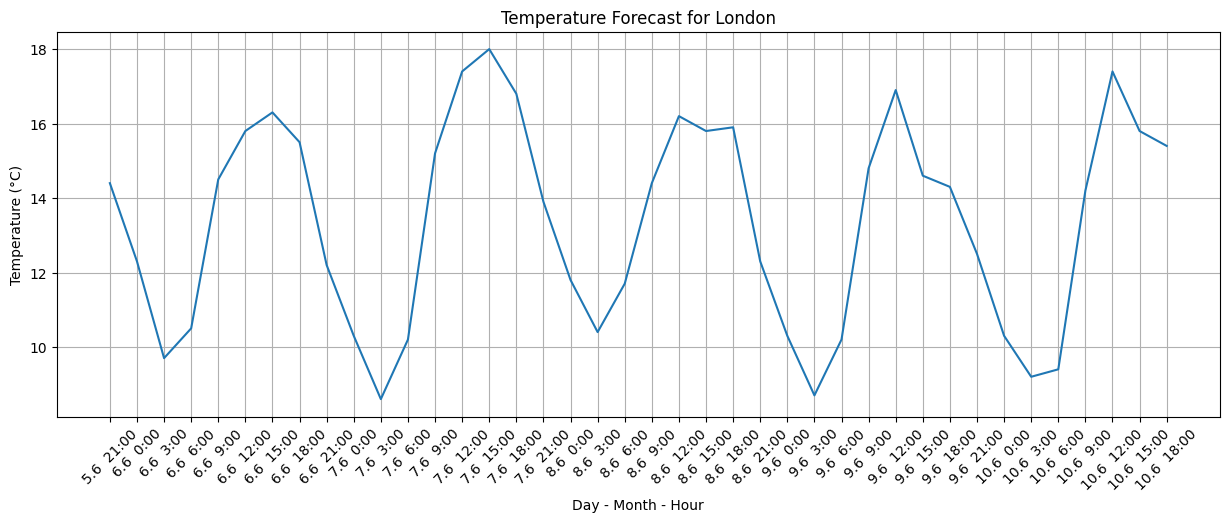

                        temp_min °C  temp_max °C  humidity %       description
day_time                                                                      
05.06.2024    21:00:00         11.9         14.4          54     broken clouds
06.06.2024    00:00:00         10.5         12.3          66   overcast clouds
06.06.2024    03:00:00          9.7          9.7          73   overcast clouds
06.06.2024    06:00:00         10.5         10.5          68   overcast clouds
06.06.2024    09:00:00         14.5         14.5          53     broken clouds
06.06.2024    12:00:00         15.8         15.8          47        light rain
06.06.2024    15:00:00         16.3         16.3          46   overcast clouds
06.06.2024    18:00:00         15.5         15.5          53        light rain
06.06.2024    21:00:00         12.2         12.2          75  scattered clouds
07.06.2024    00:00:00         10.3         10.3          76        few clouds
07.06.2024    03:00:00          8.6          8.6    

In [ ]:
hi = '''A weather forecaster is like a sapper  -
he makes mistakes only once
(but every day) \n'''

url = "https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/param_defolt.json"

defolt_parametrs = get_defolt_parametrs(url)
city = defolt_parametrs['params']['city']
units = defolt_parametrs['params']['units']
key = defolt_parametrs['params']['key']

if 'google.colab' in str(get_ipython()):

    request = True
    while request:

        print(hi)
        city = input('Enter the city: ')
        print()

        data = get_weather(city, units, key)
        if not data:
            print('Somthing gonna wrong...')
        else:
            dt_txt_datetime, temp, temp_min, temp_max, humidity, description = data_to_lists(data)
            sunrise, sunset = get_sun_time(data)
            local_time = time_in_the_city(data)

            print(f'Time in the {city}:'.ljust(19),  f'{local_time.strftime("%H:%M  %d.%m.%Y")}')
            print('Sunrise:'.ljust(15),  f'{sunrise.strftime("%H:%M:%S")}')
            print('Sunset:'.ljust(15),  f'{sunset.strftime("%H:%M:%S")}')
            print(f'Temperature:'.ljust(15),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
            print('Weather:'.ljust(15),  f'{description[0]}')
            print('Humidity:'.ljust(15),  f'{humidity[0]} %')

            plot_weather(dt_txt_datetime, temp, city)
            print(table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description))

        # weather chart covers the input field
        # want_add = input("Enter 1 to Continue or 0 to Exit: ")
        # request = (want_add == '1')
        request = False

else:
    st.title('Open Weather Forecast')
    st.write(hi)
    city = st.text_input('Enter City name: ', city)
    if st.button('Show Weather'):
        data = get_weather(city, units, key)
        if not data:
            st.write('Somthing gonna wrong...')
        else:
            dt_txt_datetime, temp, temp_min, temp_max, humidity, description = data_to_lists(data)
            sunrise, sunset = get_sun_time(data)
            local_time = time_in_the_city(data)
            st.write(f'Time in the {city}:  {local_time.strftime("%H:%M  %d.%m.%Y")}')
            st.write(f'Sunrise:      {sunrise.strftime("%H:%M")}')
            st.write(f'Sunset:       {sunset.strftime("%H:%M")}')
            st.write(f'Temperature:  from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
            st.write(f'Weather:      {description[0]}')
            st.write(f'Humidity:     {humidity[0]} %')
            df = make_df_for_streamlit(dt_txt_datetime, temp)
            st.line_chart(df)

            st.dataframe(table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description))
